In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##importing all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/train.csv")

In [ ]:
##checking the dataset
data.head()

,Customer_ID,Sign_up_date,Last_order_placed_date,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Category_of_customers,Gender,Premium,Gift_card_amount
0,ID0x340a,09/22/2012 05:57 AM,12/12/2020 01:01 AM,152,NaN,161.37,76.0,29,NaN,33,4,Active,Female,No,112
1,ID0x547,06/29/2017 08:24 PM,05/01/2019 07:07 AM,59,693.30,101.00,31.0,7,6.0,3,1,Active,Male,No,111
2,ID0x10d1,07/12/2014 06:24 AM,06/17/2015 08:28 AM,77,907.98,217.00,37.0,15,12.0,10,2,Passive,Female,No,37
3,ID0x2395,12/30/2013 03:34 PM,05/12/2018 03:30 AM,337,2406.31,239.43,153.0,40,46.0,50,19,Passive,Male,No,27
4,ID0x1fea,05/29/2015 02:29 AM,07/11/2018 01:18 PM,269,777.26,182.65,93.0,64,16.0,38,6,Passive,Female,Yes,123


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12318 entries, 0 to 12317
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             12318 non-null  object 
 1   Sign_up_date            12071 non-null  object 
 2   Last_order_placed_date  12019 non-null  object 
 3   No_of_orders_placed     12318 non-null  int64  
 4   Maximum_bill            11953 non-null  float64
 5   Minimum_bill            12318 non-null  float64
 6   No_of_Review_given      11899 non-null  float64
 7   No_of_Comment_added     12318 non-null  int64  
 8   No_of_Images_added      11834 non-null  float64
 9   No_of_issues_raised     12318 non-null  int64  
 10  Orders_returned         12318 non-null  int64  
 11  Category_of_customers   11696 non-null  object 
 12  Gender                  12318 non-null  object 
 13  Premium                 12318 non-null  object 
 14  Gift_card_amount        12318 non-null

In [ ]:
#calculating column missing percentage
(round(100 * (data.isnull().sum() / data.shape[0]),2)).sort_values(ascending=False)

Category_of_customers     5.05
No_of_Images_added        3.93
No_of_Review_given        3.40
Maximum_bill              2.96
Last_order_placed_date    2.43
Sign_up_date              2.01
Gift_card_amount          0.00
Premium                   0.00
Gender                    0.00
Orders_returned           0.00
No_of_issues_raised       0.00
No_of_Comment_added       0.00
Minimum_bill              0.00
No_of_orders_placed       0.00
Customer_ID               0.00
dtype: float64

In [ ]:
data['Category_of_customers'].value_counts()

Active      5584
Passive     4698
Inactive    1414
Name: Category_of_customers, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


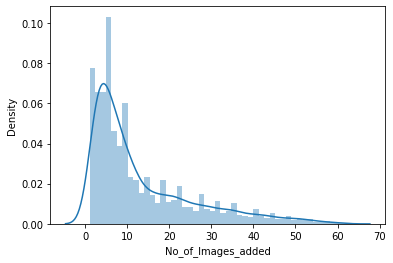

In [ ]:
##dist plot to check distribution of valribale 
sns.distplot(data['No_of_Images_added'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


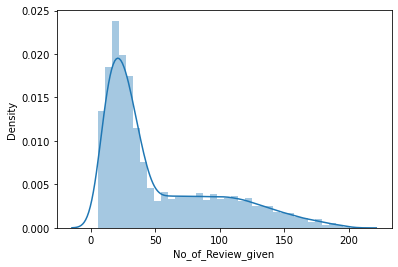

In [ ]:
sns.distplot(data['No_of_Review_given'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


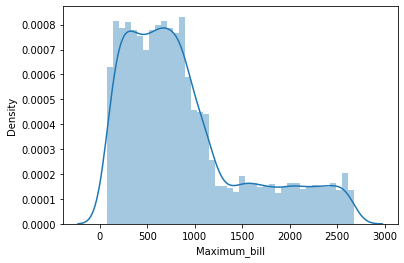

In [ ]:
sns.distplot(data['Maximum_bill'])
plt.show()

In [ ]:
## Drop the date column as it will not be useful for gift card amount prediction
data = data.drop(['Sign_up_date','Last_order_placed_date'], axis=1)

In [ ]:
data.head()

,Customer_ID,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Category_of_customers,Gender,Premium,Gift_card_amount
0,ID0x340a,152,NaN,161.37,76.0,29,NaN,33,4,Active,Female,No,112
1,ID0x547,59,693.30,101.00,31.0,7,6.0,3,1,Active,Male,No,111
2,ID0x10d1,77,907.98,217.00,37.0,15,12.0,10,2,Passive,Female,No,37
3,ID0x2395,337,2406.31,239.43,153.0,40,46.0,50,19,Passive,Male,No,27
4,ID0x1fea,269,777.26,182.65,93.0,64,16.0,38,6,Passive,Female,Yes,123


In [ ]:
## filling missing values in Category_of_customers column with mode as it is categorical
data['Category_of_customers'] = data['Category_of_customers'].fillna(data['Category_of_customers'].mode()[0])

In [ ]:
data.head()

,Customer_ID,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Category_of_customers,Gender,Premium,Gift_card_amount
0,ID0x340a,152,NaN,161.37,76.0,29,NaN,33,4,Active,Female,No,112
1,ID0x547,59,693.30,101.00,31.0,7,6.0,3,1,Active,Male,No,111
2,ID0x10d1,77,907.98,217.00,37.0,15,12.0,10,2,Passive,Female,No,37
3,ID0x2395,337,2406.31,239.43,153.0,40,46.0,50,19,Passive,Male,No,27
4,ID0x1fea,269,777.26,182.65,93.0,64,16.0,38,6,Passive,Female,Yes,123


In [ ]:
#calculating column missing percentage
(round(100 * (data.isnull().sum() / data.shape[0]),2)).sort_values(ascending=False)

No_of_Images_added       3.93
No_of_Review_given       3.40
Maximum_bill             2.96
Gift_card_amount         0.00
Premium                  0.00
Gender                   0.00
Category_of_customers    0.00
Orders_returned          0.00
No_of_issues_raised      0.00
No_of_Comment_added      0.00
Minimum_bill             0.00
No_of_orders_placed      0.00
Customer_ID              0.00
dtype: float64

In [ ]:
null_columns = ['No_of_Images_added','No_of_Review_given','Maximum_bill']

In [ ]:
data_cleaned = data

In [ ]:
data_cleaned[null_columns] = data_cleaned[null_columns].fillna(data_cleaned[null_columns].median()[0])

In [ ]:
#calculating column missing percentage
(round(100 * (data_cleaned.isnull().sum() / data_cleaned.shape[0]),2)).sort_values(ascending=False)

Gift_card_amount         0.0
Premium                  0.0
Gender                   0.0
Category_of_customers    0.0
Orders_returned          0.0
No_of_issues_raised      0.0
No_of_Images_added       0.0
No_of_Comment_added      0.0
No_of_Review_given       0.0
Minimum_bill             0.0
Maximum_bill             0.0
No_of_orders_placed      0.0
Customer_ID              0.0
dtype: float64

In [ ]:
data_cleaned.head()

,Customer_ID,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Category_of_customers,Gender,Premium,Gift_card_amount
0,ID0x340a,152,8.00,161.37,76.0,29,8.0,33,4,Active,Female,No,112
1,ID0x547,59,693.30,101.00,31.0,7,6.0,3,1,Active,Male,No,111
2,ID0x10d1,77,907.98,217.00,37.0,15,12.0,10,2,Passive,Female,No,37
3,ID0x2395,337,2406.31,239.43,153.0,40,46.0,50,19,Passive,Male,No,27
4,ID0x1fea,269,777.26,182.65,93.0,64,16.0,38,6,Passive,Female,Yes,123


In [ ]:
# Correlation matrix
cor = data_cleaned.corr()
cor

,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Gift_card_amount
No_of_orders_placed,1.000000,0.484439,0.271027,0.866173,0.838044,0.797141,0.702591,0.605214,0.564825
Maximum_bill,0.484439,1.000000,0.201452,0.481567,0.465668,0.437333,0.388137,0.332535,0.418342
Minimum_bill,0.271027,0.201452,1.000000,0.270193,0.261303,0.254931,0.220537,0.190872,0.247453
No_of_Review_given,0.866173,0.481567,0.270193,1.000000,0.845904,0.805813,0.707789,0.614843,0.565380
No_of_Comment_added,0.838044,0.465668,0.261303,0.845904,1.000000,0.776289,0.687981,0.595520,0.545856
No_of_Images_added,0.797141,0.437333,0.254931,0.805813,0.776289,1.000000,0.650590,0.561199,0.521434
No_of_issues_raised,0.702591,0.388137,0.220537,0.707789,0.687981,0.650590,1.000000,0.488384,0.463886
Orders_returned,0.605214,0.332535,0.190872,0.614843,0.595520,0.561199,0.488384,1.000000,0.331552
Gift_card_amount,0.564825,0.418342,0.247453,0.565380,0.545856,0.521434,0.463886,0.331552,1.000000


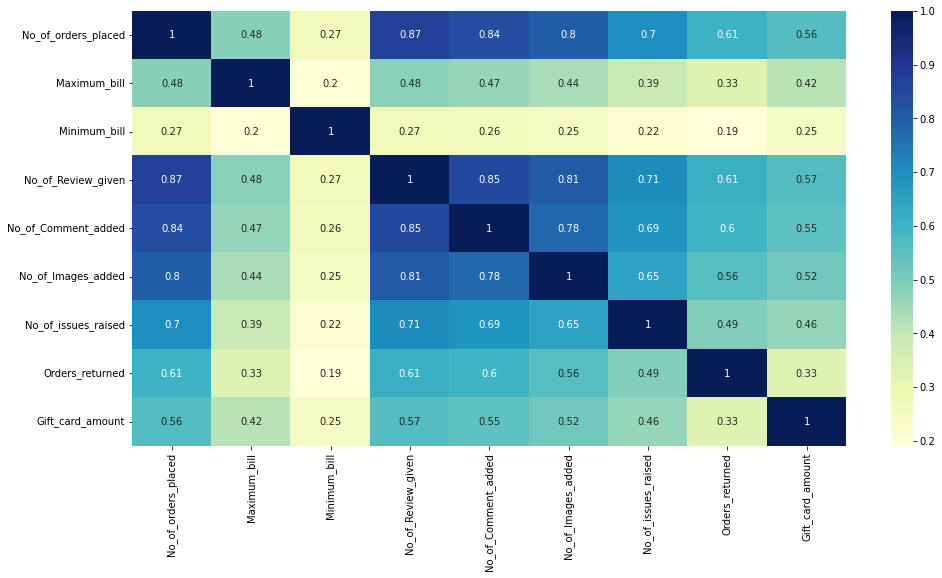

In [ ]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
##dropping customer id as it will not be helpful for model
data_cleaned = data_cleaned.drop(['Customer_ID'], axis=1)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12318 entries, 0 to 12317
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No_of_orders_placed    12318 non-null  int64  
 1   Maximum_bill           12318 non-null  float64
 2   Minimum_bill           12318 non-null  float64
 3   No_of_Review_given     12318 non-null  float64
 4   No_of_Comment_added    12318 non-null  int64  
 5   No_of_Images_added     12318 non-null  float64
 6   No_of_issues_raised    12318 non-null  int64  
 7   Orders_returned        12318 non-null  int64  
 8   Category_of_customers  12318 non-null  object 
 9   Gender                 12318 non-null  object 
 10  Premium                12318 non-null  object 
 11  Gift_card_amount       12318 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
data_cleaned_categorical = data_cleaned.select_dtypes(include=['object'])
data_cleaned_categorical.head()

,Category_of_customers,Gender,Premium
0,Active,Female,No
1,Active,Male,No
2,Passive,Female,No
3,Passive,Male,No
4,Passive,Female,Yes


In [ ]:
data_cleaned_categorical_cols = data_cleaned_categorical.columns
data_cleaned_categorical_cols

Index(['Category_of_customers', 'Gender', 'Premium'], dtype='object')

In [ ]:
data_cleaned_categorical_dummies= pd.get_dummies(data_cleaned_categorical, drop_first=True)
data_cleaned_categorical_dummies.head()

,Category_of_customers_Inactive,Category_of_customers_Passive,Gender_Male,Premium_Yes
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,1


In [ ]:
# Concatenate dummy variables with data_cleaned
data_cleaned = pd.concat([data_cleaned, data_cleaned_categorical_dummies], axis=1)

In [ ]:
data_cleaned.head()

,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Category_of_customers,Gender,Premium,Gift_card_amount,Category_of_customers_Inactive,Category_of_customers_Passive,Gender_Male,Premium_Yes
0,152,8.00,161.37,76.0,29,8.0,33,4,Active,Female,No,112,0,0,0,0
1,59,693.30,101.00,31.0,7,6.0,3,1,Active,Male,No,111,0,0,1,0
2,77,907.98,217.00,37.0,15,12.0,10,2,Passive,Female,No,37,0,1,0,0
3,337,2406.31,239.43,153.0,40,46.0,50,19,Passive,Male,No,27,0,1,1,0
4,269,777.26,182.65,93.0,64,16.0,38,6,Passive,Female,Yes,123,0,1,0,1


In [ ]:
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned_categorical_cols], axis=1)

In [ ]:
data_cleaned.head()

,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Gift_card_amount,Category_of_customers_Inactive,Category_of_customers_Passive,Gender_Male,Premium_Yes
0,152,8.00,161.37,76.0,29,8.0,33,4,112,0,0,0,0
1,59,693.30,101.00,31.0,7,6.0,3,1,111,0,0,1,0
2,77,907.98,217.00,37.0,15,12.0,10,2,37,0,1,0,0
3,337,2406.31,239.43,153.0,40,46.0,50,19,27,0,1,1,0
4,269,777.26,182.65,93.0,64,16.0,38,6,123,0,1,0,1


In [ ]:
data_cleaned.columns

Index(['No_of_orders_placed', 'Maximum_bill', 'Minimum_bill',
       'No_of_Review_given', 'No_of_Comment_added', 'No_of_Images_added',
       'No_of_issues_raised', 'Orders_returned', 'Gift_card_amount',
       'Category_of_customers_Inactive', 'Category_of_customers_Passive',
       'Gender_Male', 'Premium_Yes'],
      dtype='object')

In [ ]:
# Create a list of the variables that you need to scale
varlist= ['No_of_orders_placed', 'Maximum_bill', 'Minimum_bill',
       'No_of_Review_given', 'No_of_Comment_added', 'No_of_Images_added',
       'No_of_issues_raised', 'Orders_returned', 'Gift_card_amount',
       'Category_of_customers_Inactive', 'Category_of_customers_Passive',
       'Gender_Male', 'Premium_Yes']

In [ ]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
data_cleaned[varlist] = scaler.fit_transform(data_cleaned[varlist])

In [ ]:
data_cleaned.head()

,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Gift_card_amount,Category_of_customers_Inactive,Category_of_customers_Passive,Gender_Male,Premium_Yes
0,0.268437,-1.296168,-0.394662,0.541611,0.304162,-0.404262,0.894959,0.136322,0.891538,-0.360107,-0.785198,-1.265930,-0.554406
1,-0.634306,-0.262378,-1.281247,-0.467109,-0.789408,-0.568062,-0.813542,-0.555471,0.864220,-0.360107,-0.785198,0.789933,-0.554406
2,-0.459581,0.061471,0.422312,-0.332613,-0.391746,-0.076661,-0.414892,-0.324873,-1.157331,-0.360107,1.273565,-1.265930,-0.554406
3,2.064216,2.321734,0.751716,2.267643,0.850948,2.707947,1.863110,3.595286,-1.430513,-0.360107,1.273565,0.789933,-0.554406
4,1.404146,-0.135723,-0.082147,0.922683,2.043935,0.250940,1.179709,0.597517,1.192039,-0.360107,1.273565,-1.265930,1.803733


In [ ]:
y_train = data_cleaned.pop('Gift_card_amount')
x_train = data_cleaned

In [ ]:
##Building the first model with all the features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.15476756  0.15023163  0.07159875  0.1774329   0.10218605  0.07913927
  0.05032715 -0.08173936 -0.22435693 -0.21535518  0.00346942  0.22827277]
-6.153125172428606e-17


In [ ]:
##Model Building Using RFE
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm_1 = LinearRegression()
rfe1 = RFE(lm_1, n_features_to_select=10)

# Fit with 10 features
rfe1.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True False  True  True  True False  True]
[1 1 1 1 1 1 2 1 1 1 3 1]


In [ ]:
!pip install statsmodels

In [ ]:
##Model building and evaluation.
import statsmodels.api as sm

# Subset the features selected by rfe1
rfe_cols = x_train.columns[rfe1.support_]

#subset the training model for 10 features
X_train_rfe1 = x_train[rfe_cols]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)

lm_2 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Gift_card_amount   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     1231.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:11:24   Log-Likelihood:                -13208.
No. Observations:               12318   AIC:                         2.644e+04
Df Residuals:                   12307   BIC:                         2.652e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
##model has R squared as 50% and lets check the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
##Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,No_of_Review_given,5.53
1,No_of_orders_placed,5.18
5,No_of_Comment_added,4.40
6,No_of_Images_added,3.36
7,Orders_returned,1.70
2,Maximum_bill,1.35
8,Category_of_customers_Inactive,1.12
3,Minimum_bill,1.09
9,Category_of_customers_Passive,1.09
0,const,1.00


In [ ]:
## the variables seems significant but we have some high VIFs. Let's drop them and see if the Adjusted R-squared score is getting affected.

In [ ]:
X_train_rfe1.drop('No_of_Review_given', axis=1, inplace = True)

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 9 variables
lm_3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:       Gift_card_amount   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1333.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:05:53   Log-Likelihood:                -13288.
No. Observations:               12318   AIC:                         2.660e+04
Df Residuals:                   12308   BIC:                         2.667e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
##Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,No_of_orders_placed,4.35
4,No_of_Comment_added,3.91
5,No_of_Images_added,3.13
6,Orders_returned,1.67
2,Maximum_bill,1.34
7,Category_of_customers_Inactive,1.11
3,Minimum_bill,1.09
8,Category_of_customers_Passive,1.09
0,const,1.00
9,Premium_Yes,1.00


In [ ]:
## the variables seems significant but we have some high VIFs. Let's drop them and see if the Adjusted R-squared score is getting affected.

In [ ]:
X_train_rfe1.drop('No_of_orders_placed', axis=1, inplace = True)

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm_4 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:       Gift_card_amount   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     1423.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:12:37   Log-Likelihood:                -13446.
No. Observations:               12318   AIC:                         2.691e+04
Df Residuals:                   12309   BIC:                         2.698e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
##Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,No_of_Comment_added,2.91
4,No_of_Images_added,2.67
5,Orders_returned,1.62
1,Maximum_bill,1.32
6,Category_of_customers_Inactive,1.11
2,Minimum_bill,1.09
7,Category_of_customers_Passive,1.09
0,const,1.00
8,Premium_Yes,1.00


In [ ]:
y_train_price = lm_4.predict(X_train_rfe1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

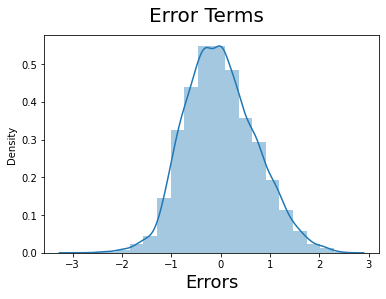

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

In [ ]:
# r2_score for 8 variables
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)

#score = max( 0 , 100*(r2_score(y_train, y_train_price)) )
#print(score)

0.4804297706646087

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/test.csv")

In [ ]:
##checking the test dataset
data_test.head()

,Customer_ID,Sign_up_date,Last_order_placed_date,No_of_orders_placed,Maximum_bill,Minimum_bill,No_of_Review_given,No_of_Comment_added,No_of_Images_added,No_of_issues_raised,Orders_returned,Category_of_customers,Gender,Premium
0,ID0x163e,04/29/2017 03:10 PM,09/02/2017 09:52 AM,79,217.26,194.00,29.0,10,4.0,9,2,Passive,Male,No
1,ID0x22c3,10/13/2014 11:45 AM,08/30/2015 11:43 PM,52,320.02,167.00,22.0,12,7.0,10,0,Passive,Male,No
2,ID0x3d79,11/07/2010 06:36 PM,10/24/2011 12:29 PM,63,127.26,261.00,21.0,9,10.0,8,0,Inactive,Female,Yes
3,ID0x25f1,06/01/2018 07:59 PM,01/23/2020 01:32 AM,29,745.10,158.70,13.0,5,3.0,5,0,Active,Male,No
4,ID0x1fa5,09/27/2015 01:13 AM,04/30/2016 04:29 PM,40,825.36,104.93,14.0,4,6.0,4,1,Passive,Male,No


In [ ]:
#calculating column missing percentage
(round(100 * (data_test.isnull().sum() / data_test.shape[0]),2)).sort_values(ascending=False)

Category_of_customers     4.22
No_of_Images_added        3.93
No_of_Review_given        3.70
Maximum_bill              2.92
Last_order_placed_date    2.63
Sign_up_date              1.72
Premium                   0.00
Gender                    0.00
Orders_returned           0.00
No_of_issues_raised       0.00
No_of_Comment_added       0.00
Minimum_bill              0.00
No_of_orders_placed       0.00
Customer_ID               0.00
dtype: float64